In [39]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import rf2 as rf
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [40]:
class QM(object):
    def __init__(self,E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):
    
        """right hand side of the differential equation"""
        u = uv[1]
        v = 2*(self.Potential(x) - self.E)*uv[0]
        return np.ravel(np.array([u, v]))

    def Potential(self, x):
        # finite square well potential
        a = 10**(-11) # width of well
        V0 = 50 # depth of well
        if (abs(x) > a/2.):
            return 0
        else :
            return -V0 

In [41]:
def match2(E):
    p_up = QM(E = En, npoints = 1000, x_start = -10*a)
    p_down = QM(E = En, npoints = 1000, x_start = 10*a)
    
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()
    
    return (p_up.uv_end[0]*p_down.uv_end[1]) - (p_up.uv_end[1]*p_down.uv_end[0])

def match(En):
    #a = 1.0e-11
    p_up = QM(E = En, npoints = 1000, x_start = -10)
    p_down = QM(E = En, npoints = 1000, x_start = 10)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]

0.012337007521206195
0.04934803962569839
0.11103304862838392
0.19739216804366716
0.3084253597245754
0.4441334819779935
0.604515237806851
0.7895694446549959
0.99929671287399
1.2336964321122716


(-1.5e-10, 1.5e-10)

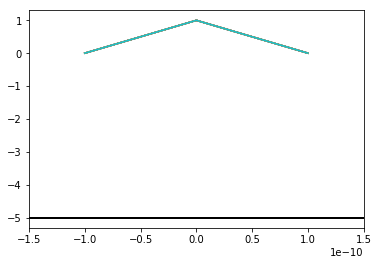

In [42]:
En = -50.0
dE = 0.01
E_states = []
a = 10**(-11)
y = 0

while(len(E_states) < 10):
    if(match(En)*match(En+dE) < 0):
        E = rf.bisect(match, En, En+dE)
        E_states.append(E)
        print(E)
        
        
        dx = a/100
        p_up = QM(E = E, npoints = 1000+4, x_start = -10*a, x_end = a/25)
        p_down = QM(E = E, npoints = 1000-4, x_start = 10*a, x_end = a/25)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        c = p_up.uv_end[0]/p_down.uv_end[0]
        
        p = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        x = np.linspace(-10*a, 10*a, 2000-1, endpoint = True)
        plt.plot(x, p/max(p))
        
    y += 1
    En = En + dE
plt.plot(xa, np.vectorize(p_up.Potential)(xa)/10., color = 'k', lw =2)
plt.xlim(-15*a,15*a)